<CENTER><img src="opendata-top-transblack.png" style="width:60%"></CENTER>

<CENTER><h1>Simple pyROOT notebook example</h1></CENTER>

In [1]:
import ROOT
from math import *
import sys
sys.path.insert(0, '~/atlas-outreach-data-tools-framework-master/')
#import Analysis

Welcome to ROOTaaS 6.06/08


In [2]:
## f = ROOT.TFile.Open("http://opendata.atlas.cern/release/samples/MC/mc_105986.ZZ.root")
bgs= ROOT.TFile.Open("mc_105985.WW.root")
sig = ROOT.TFile.Open("mc_161005.ggH125_WW2lep.root")

In [3]:
c = ROOT.TCanvas("testCanvas","a first way to plot a variable",800,600)

In [4]:
b = bgs.Get("mini")
s = sig.Get("mini") # t for signal

In [5]:
h_bgs = ROOT.TH1F("variable2_bgs","Example plot: Number of Jets",10,0,10)
h_sig = ROOT.TH1F("variable2_sig","Example plot: Number of Jets",10,0,10)

In [6]:
# Selection for signal
weight = 0.00014

for event in s:
    # First, select only two lepton or more
    if s.lep_n > 1:
        # Make sure the e
        if s.lep_type[0] != s.lep_type[1]:
            # Let's define one TLorentz vector for each, e.i. two vectors!
            leadingLep = ROOT.TLorentzVector(s.lep_pt[0], s.lep_eta[0], s.lep_phi[0], s.lep_E[0])
            secondLep  = ROOT.TLorentzVector(s.lep_pt[1], s.lep_eta[1], s.lep_phi[1], s.lep_E[1])

            # Next line does the addition of the two TLorentz vectors above and so, we can ask the mass very easy     
            TL_ll = leadingLep + secondLep
            mll = TL_ll.M()/1000.
            if mll < 55 or mll > 10:
                has_btags = any([w > 0.789 for w in s.jet_MV1])
                if not has_btags:
                #btags = sum([1 for count in range(0,3) if s.jet_MV1() > 0.789])
                #if btags = 0:
                # total tranvers momentum
                    if s.lep_pt > 10 or s.lep_pt < 200:
                        if s.met_et/1000. < 200:
                            ll = s.lep_phi[0] - s.lep_phi[1]   
                            if s.met_phi - ll < 180 or s.met_phi - ll > 10:
                                if ll < 100:
                                    h_sig.Fill(s.jet_n, weight)

print "Done"

Done


In [7]:
# selection for background
for event in b:
    # First is to use minimal two lepton
    if b.lep_n > 1:
        if b.lep_type[0] != b.lep_type[1]:
            # Let's define one TLorentz vector for each, e.i. two vectors!
            leadingLepB = ROOT.TLorentzVector(b.lep_pt[0], b.lep_eta[0], b.lep_phi[0], b.lep_E[0])
            secondLepB  = ROOT.TLorentzVector(b.lep_pt[1], b.lep_eta[1], b.lep_phi[1], b.lep_E[1])

            # Next line does the addition of the two TLorentz vectors above and so, we can ask the mass very easy     
            TL_llB = leadingLepB + secondLepB
            mllB = TL_ll.M()/1000.
            if mllB < 55 or mllB > 10:
                has_btagsB = any([w > 0.789 for w in b.jet_MV1])
                if not has_btagsB:
                    # total tranvers momentum
                    if b.lep_pt > 10 or b.lep_pt < 200:
                        if b.met_et/1000. < 200:
                            llB = b.lep_phi[0] - b.lep_phi[1]   
                            if b.met_phi - llB < 180 or b.met_phi - llB > 10:
                                if llB < 100:
                                    h_bgs.Fill(b.jet_n)
print "Done"

Done


In [8]:
scale_sig = h_sig.Integral()
h_sig.Scale(1/scale_sig)

orig_scale_sig = 14.
orig_scale_bgs = 500000.

scale_bgs = h_bgs.Integral()
h_sig.Scale(1/scale_bgs)

print "scale_sig = ", scale_sig
print "scale_bgs = ", scale_bgs

# calculate significance
orig_sb = orig_scale_sig / sqrt(orig_scale_bgs)
sb = scale_sig / sqrt(scale_bgs)

print "original sb =", orig_sb
print "new sb =", sb 

scale_sig =  4.94045042869
scale_bgs =  34758.0
original sb = 0.0197989898732
new sb = 0.0264995901215


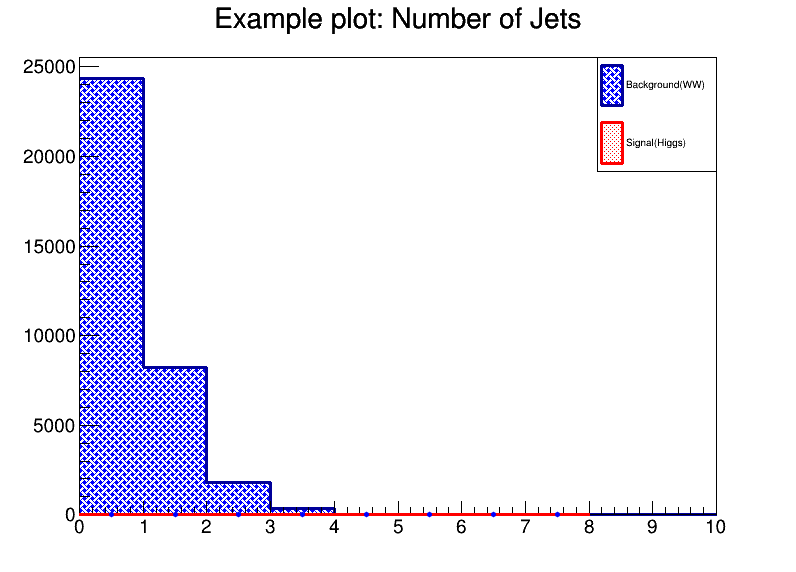

In [9]:
h_bgs.SetFillStyle(3008)
h_bgs.SetFillColor(4)
h_sig.SetFillStyle(3003)
h_sig.SetFillColor(2)

legend=ROOT.TLegend(0.75,0.7,0.9,0.9)
legend.AddEntry(h_bgs,"Background(WW)","f")
legend.AddEntry(h_sig,"Signal(Higgs)","f")

h_sig.SetLineColor(2)
h_sig.SetStats(0)
h_bgs.SetStats(0)

h_bgs.Draw()
h_sig.Draw("same")
legend.Draw()
c.Draw()
